# TPE N°2 : Les expérimentations sur la fonction vue en cours

## Noms et Matricules des membres


| MATRICULES  |           NOMS DES MEMBRES           |
|-------------|--------------------------------------|
|   22T2960   |           BELL ARSÈNE KEVIN          |
|   22W2147   |           MELONG LETHYCIA            |
|   22W2164   |       DASSI MANDJO LEA JUSTINE       |

Notre étude portera tout le long sur la Fonction de Himmelblau **f(x, y) = 0.5*x² + 3.5*y²**

Nous implémenterons la méthode de plus profonde descente pour minimiser **f(x, y) = 0.5*x² + 3.5*y²** et par la suite, nous analyserons des résultats obtenus.

In [4]:
import sympy

x,y = sympy.symbols('x y')
f = 0.5*x**2 + 3.5*y**2

grad_f=[sympy.diff(f,var) for var in (x,y)]
print("\nle gradient est :", grad_f)

points_critiques = sympy.solve(grad_f, (x, y))
print("\nles points critiques sont :", points_critiques)

hessienne = sympy.hessian(f, (x,y))
print("\nla hessienne est :", hessienne)



le gradient est : [1.0*x, 7.0*y]

les points critiques sont : {x: 0.0, y: 0.0}

la hessienne est : Matrix([[1.00000000000000, 0], [0, 7.00000000000000]])


Ainsi, l'unique point minimum est le **point (0, 0)**.

Nous pouvons donc conclure que la fonction f est une fonction **strictement convexe**, qui admet au moins un minimum global dont le point (0, 0).

### 2) - Appliquons les algorithmes de gradient à pas fixe et à pas optimal sur la fonction f

Implémentons ces deux méthodes à partir du point x0 = (7,1.5) et illustrons leurs comportements.

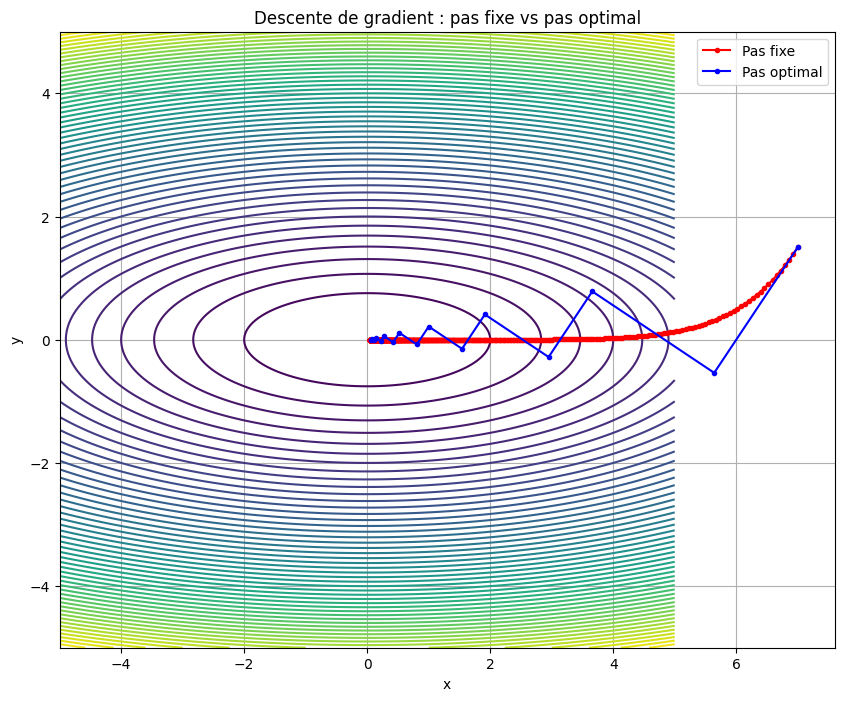

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# ------------------------------
# 1. Définition symbolique
# ------------------------------
x, y, alpha = sp.symbols('x y alpha', real=True)

f = 0.5*x**2 + 3.5*y**2
grad_f = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])

# Fonction numérique
f_num = sp.lambdify((x, y), f, "numpy")
grad_num = sp.lambdify((x, y), grad_f, "numpy")

# ------------------------------
# 2. Algorithmes
# ------------------------------

def gradient_pas_fixe(x0, step=0.01, n_iter=500):
    xk = np.array(x0, dtype=float)
    pts = [xk.copy()]
    for i in range(n_iter):
        g = np.array(grad_num(xk[0], xk[1]), dtype=float).flatten()
        xk = xk - step * g
        pts.append(xk.copy())
    return np.array(pts)


def gradient_pas_optimal(x0, n_iter=20):
    xk = np.array(x0, dtype=float)
    pts = [xk.copy()]
    for i in range(n_iter):
        g = np.array(grad_num(xk[0], xk[1]), dtype=float).flatten()

        # Ligne de recherche : f(xk - alpha*g)
        expr_alpha = f.subs({x: xk[0] - alpha*g[0],
                             y: xk[1] - alpha*g[1]})

        dphi = sp.diff(expr_alpha, alpha)
        sols = sp.solve(dphi)

        # garder alpha réel et positif
        alpha_vals = [float(s) for s in sols if s.is_real and float(s) > 0]

        if len(alpha_vals) == 0:
            break

        alpha_star = min(alpha_vals)

        xk = xk - alpha_star * g
        pts.append(xk.copy())

    return np.array(pts)


x0 = [7, 1.5] 

pts_fixed = gradient_pas_fixe(x0, step=0.01, n_iter=510)
pts_opt = gradient_pas_optimal(x0, n_iter=15)

# ------------------------------
# 3. Tracé des lignes de niveau
# ------------------------------
X = np.linspace(-5, 5, 400)
Y = np.linspace(-5, 5, 400)
XX, YY = np.meshgrid(X, Y)
ZZ = f_num(XX, YY)

plt.figure(figsize=(10, 8))
plt.contour(XX, YY, ZZ, levels=50)
plt.title("Descente de gradient : pas fixe vs pas optimal")
plt.xlabel("x")
plt.ylabel("y")

# ------------------------------
# 4. Tracé des trajectoires
# ------------------------------
plt.plot(pts_fixed[:,0], pts_fixed[:,1], 'r.-', label="Pas fixe")
plt.plot(pts_opt[:,0], pts_opt[:,1], 'b.-', label="Pas optimal")

plt.legend()
plt.grid(True)
plt.show()


**Remarques :**

- La méthode de descente de gradient à pas optimal s'avère etre extremement efficace car elle obtient plus rapidement le résultat.
- La méthode de descente de gradient à pas fixe quant à elle, bien qu'elle permet d'atteindre le meme résultat est beaucoup plus lente que la méthode de plus profonde descente. Elle semble l'obtenir en plus de 500 itérations.

#### Analysons les nombres d'itérations de la méthode de plus profonde descente

In [21]:
import pandas as pd

def gradient_pas_optimal_table(x0, n_iter=50):
    xk = np.array(x0, dtype=float)
    iterations = []

    for k in range(n_iter):

        g = np.array(grad_num(xk[0], xk[1]), dtype=float).flatten()
        norm2g = np.dot(g, g)
        fx = f_num(xk[0], xk[1])

        expr_alpha = f.subs({
            x: xk[0] - alpha * g[0],
            y: xk[1] - alpha * g[1]
        })

        dphi = sp.diff(expr_alpha, alpha)

        sols = sp.solve(dphi)

        alpha_vals = []
        for s in sols:
            try:
                s_val = float(s)
                if s.is_real and s_val > 0:
                    alpha_vals.append(s_val)
            except Exception:
                pass

        if len(alpha_vals) == 0:
            break

        alpha_star = min(alpha_vals)

        iterations.append([
            fx,             
            norm2g,         
            alpha_star,     
            xk[0],       
            xk[1]        
        ])

        xk = xk - alpha_star * g

    df = pd.DataFrame(
        iterations,
        columns=["f(xk,yk)", "norme2_grad", "alpha", "xk", "yk"]
    )
    return df


x0 = [7, 1.5]
df_opt = gradient_pas_optimal_table(x0, n_iter=50)
print(df_opt)

        f(xk,yk)   norme2_grad     alpha            xk            yk
0   3.237500e+01  1.592500e+02  0.194030  7.000000e+00  1.500000e+00
1   1.692537e+01  4.597639e+01  0.351351  5.641791e+00 -5.373134e-01
2   8.848440e+00  4.352476e+01  0.194030  3.659540e+00  7.841872e-01
3   4.625889e+00  1.256585e+01  0.351351  2.949480e+00 -2.809029e-01
4   2.418375e+00  1.189579e+01  0.194030  1.913176e+00  4.099663e-01
5   1.264306e+00  3.434383e+00  0.351351  1.541963e+00 -1.468536e-01
6   6.609683e-01  3.251249e+00  0.194030  1.000192e+00  2.143269e-01
7   3.455486e-01  9.386543e-01  0.351351  8.061251e-01 -7.677382e-02
8   1.806498e-01  8.886019e-01  0.194030  5.228919e-01  1.120483e-01
9   9.444219e-02  2.565445e-01  0.351351  4.214353e-01 -4.013669e-02
10  4.937357e-02  2.428646e-01  0.194030  2.733634e-01  5.857788e-02
11  2.581208e-02  7.011640e-02  0.351351  2.203228e-01 -2.098312e-02
12  1.349433e-02  6.637754e-02  0.194030  1.429121e-01  3.062401e-02
13  7.054723e-03  1.916358e-02  0.

Nous constatons qu'effectivement pour une précision eps = 10^-1; en 7 itérations, le critère d'optimalité est satisfait. 

Pour une précision supérieure à eps = 10^-4, à partir de la 28ième itération on approche le plus possible le résultat et ce n'est qu'à la 49-50 ième itération que le résultat devient constant et que le critère d'optimalité soit satisfait. 

#### Analysons les nombres d'itérations de la méthode de gradient à pas fixe

In [25]:
def iterations_pour_minimum(x0, alpha, tol=1e-5, max_iter=1000):
    xk = np.array(x0, float)
    for k in range(1, max_iter+1):
        g = np.array(grad_num(xk[0], xk[1])).flatten()
        if np.linalg.norm(g) < tol:
            return k  
        xk = xk - alpha * g
    return max_iter  


x0 = [7, 1.5] 
alphas = np.linspace(0.2, 0.3, 7)
alphas.sort() 
n = len(alphas)

# --- Calcul du nombre d'itérations pour chaque pas ---
iterations = [iterations_pour_minimum(x0, alpha) for alpha in alphas]

# --- Création du tableau ---
df = pd.DataFrame([alphas, iterations], index=['alpha', 'k'])
df.columns = [f'α{i+1}' for i in range(n)]

print(df)

         α1         α2         α3     α4         α5          α6      α7
alpha   0.2   0.216667   0.233333   0.25   0.266667    0.283333     0.3
k      62.0  57.000000  52.000000  50.00  98.000000  826.000000  1000.0


Nous concluons que le pas doit etre entre 0.22 et 0.026; car le nombre d'itérations explose en dehors de cet intervalle.